### dataset taken from https://www.kaggle.com/c/demand-forecasting-kernels-only/data

# step 1: data preprocessing and analysis

# i .preprocessing

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
import statsmodels.api as sm
# rcParams['figure.figsize'] = 15, 6# width 10 hieght 6

dataset = pd.read_csv("train.csv")#load dataset

del dataset['store']

dataset['date'] = pd.to_datetime(dataset['date'])#convert to date time object
itemno = 5#select item (1 to 50)
dffiltered = dataset[dataset['item'] == itemno]#select one item
print(dffiltered.head())
a=dffiltered.groupby(dffiltered['date'].dt.date)# sum all sold items at that dayZZZZZZZZZZZZZZZZZZZZZZCULPR
dffiltered=a.sum()#grouped or summed
print(dffiltered.head())
del dffiltered['item']
#index to date time index
dffiltered.index = pd.to_datetime(dffiltered.index)
# for example, to get the sum each day:
# df.groupby(df['date'].dt.date).sum()
train, test = np.split(dffiltered, [int(.8*len(dffiltered))])#first ko ma .8 jancha
df=train
print(df.head())
print(df.values[2])

            date  item  sales
73040 2013-01-01     5     11
73041 2013-01-02     5      6
73042 2013-01-03     5      8
73043 2013-01-04     5      9
73044 2013-01-05     5      8
            item  sales
date                   
2013-01-01    50     83
2013-01-02    50     81
2013-01-03    50     96
2013-01-04    50    108
2013-01-05    50    100
            sales
date             
2013-01-01     83
2013-01-02     81
2013-01-03     96
2013-01-04    108
2013-01-05    100
[96]


# ii. analysis

In [2]:
dfWeek=df.resample('W', how='sum')
print(dfWeek.head(5))
dfMonth=df.resample('M', how='sum')
print(dfMonth.head())
print(df.tail())

            sales
date             
2013-01-06    593
2013-01-13    692
2013-01-20    701
2013-01-27    742
2013-02-03    758
            sales
date             
2013-01-31   3103
2013-02-28   3220
2013-03-31   4307
2013-04-30   4729
2013-05-31   5392
            sales
date             
2016-12-26    111
2016-12-27    128
2016-12-28    155
2016-12-29    140
2016-12-30    172


c:\users\acer\desktop\minor\arima\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  """Entry point for launching an IPython kernel.
c:\users\acer\desktop\minor\arima\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 432x288 with 0 Axes>

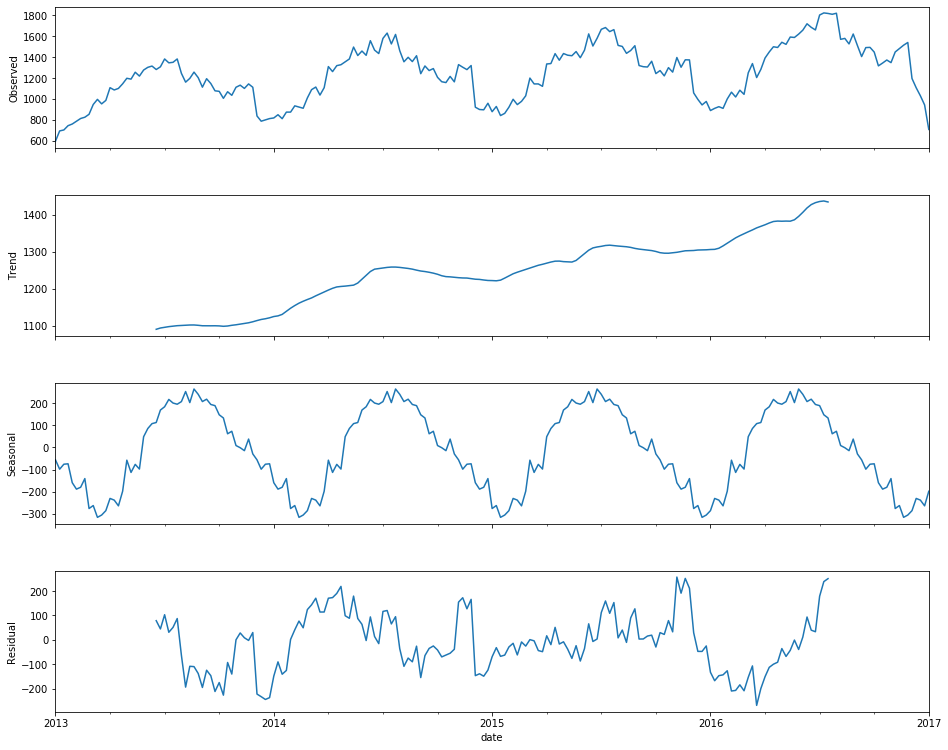

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(dfWeek['sales'], model='additive', freq=48)

fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 12)

In [4]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, window = 20, cutoff = 0.01):
        #Determing rolling statistics
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC', maxlag = 20 )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-value = %.4f. The series is likely non-stationary.' % pvalue)
    
    print(dfoutput)



In [5]:
#pacf acf arko library bata
def bar_plot(timeseriesData,lagNum=40):
    import statsmodels.api as sm
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(timeseriesData, lags=lagNum, ax=ax1) # 
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(timeseriesData, lags=lagNum, ax=ax2)# , lags=40

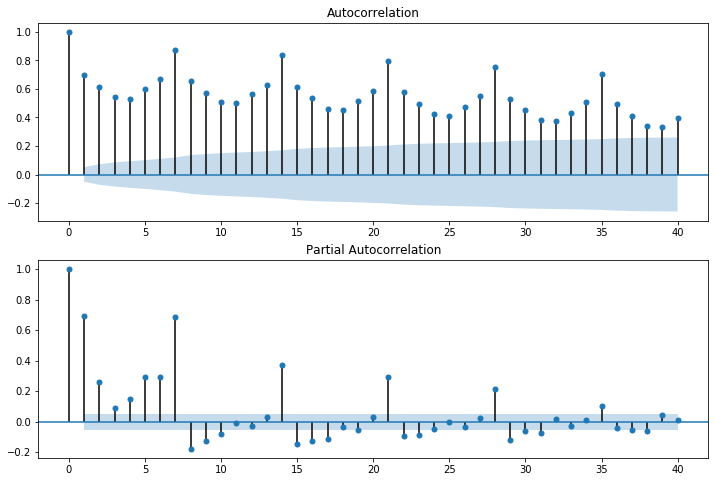

In [6]:
bar_plot(df)

# step 2 : Dickey fuller test for stationarity

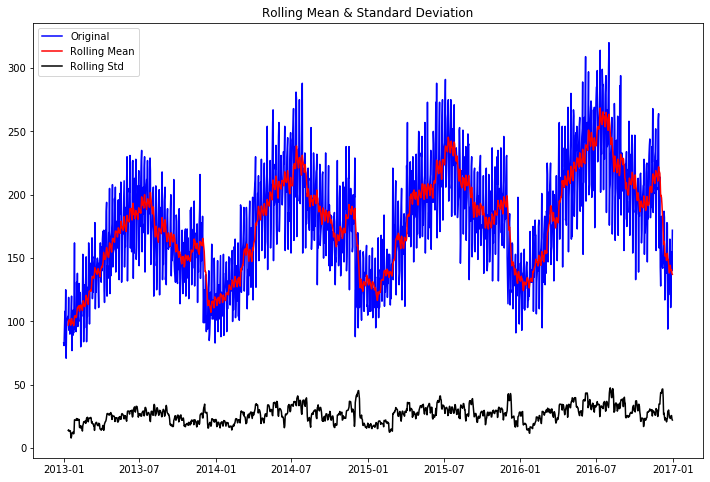

Results of Dickey-Fuller Test:
p-value = 0.1025. The series is likely non-stationary.
Test Statistic                   -2.555529
p-value                           0.102541
#Lags Used                       20.000000
Number of Observations Used    1439.000000
Critical Value (1%)              -3.434902
Critical Value (5%)              -2.863551
Critical Value (10%)             -2.567840
dtype: float64


In [7]:
test_stationarity(df.sales, window = 12)

# here P is not less than 0.05 i.e false so <br>
# Step 3: Calculate difference series

In [8]:
first_diff = df.sales - df.sales.shift(1)# right tira shift show first becomes nan
first_diff = first_diff.dropna(inplace = False)



# carry out  step 2 i.e dickey fuller test

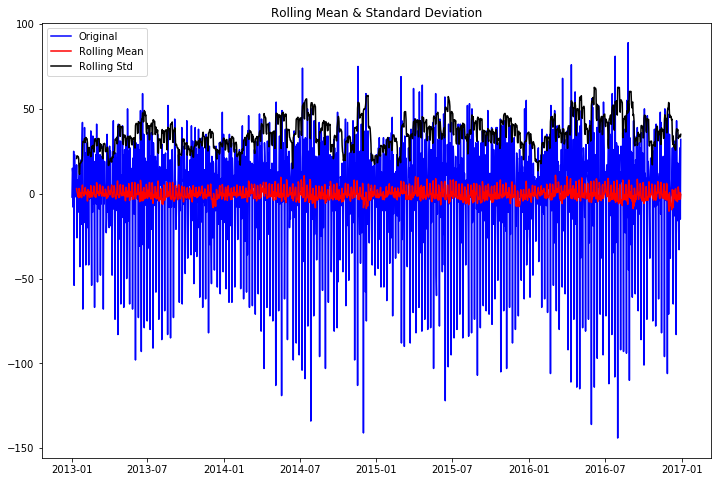

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -1.018522e+01
p-value                        6.535409e-18
#Lags Used                     2.000000e+01
Number of Observations Used    1.438000e+03
Critical Value (1%)           -3.434906e+00
Critical Value (5%)           -2.863552e+00
Critical Value (10%)          -2.567841e+00
dtype: float64


In [9]:
test_stationarity(first_diff, window = 12)

In [10]:
first_diff = pd.DataFrame({'date':first_diff.index, 'sales':first_diff.values})
print(type(first_diff))

print(first_diff)
first_diff['date'] = pd.to_datetime(first_diff['date'])
first_diff = first_diff.set_index('date') 
print(first_diff)


<class 'pandas.core.frame.DataFrame'>
           date  sales
0    2013-01-02   -2.0
1    2013-01-03   15.0
2    2013-01-04   12.0
3    2013-01-05   -8.0
4    2013-01-06   25.0
5    2013-01-07  -54.0
6    2013-01-08   23.0
7    2013-01-09    6.0
8    2013-01-10    2.0
9    2013-01-11    2.0
10   2013-01-12   -2.0
11   2013-01-13   17.0
12   2013-01-14  -26.0
13   2013-01-15    8.0
14   2013-01-16  -11.0
15   2013-01-17    2.0
16   2013-01-18    5.0
17   2013-01-19   11.0
18   2013-01-20   12.0
19   2013-01-21  -43.0
20   2013-01-22   17.0
21   2013-01-23   -5.0
22   2013-01-24   20.0
23   2013-01-25  -18.0
24   2013-01-26   29.0
25   2013-01-27   42.0
26   2013-01-28  -68.0
27   2013-01-29    2.0
28   2013-01-30   -3.0
29   2013-01-31   -1.0
...         ...    ...
1429 2016-12-01  -71.0
1430 2016-12-02  -15.0
1431 2016-12-03   35.0
1432 2016-12-04   20.0
1433 2016-12-05  -38.0
1434 2016-12-06   -2.0
1435 2016-12-07   -1.0
1436 2016-12-08    4.0
1437 2016-12-09   14.0
1438 2016-12-10   2

# Step 4: Plot ACF and PACF plots

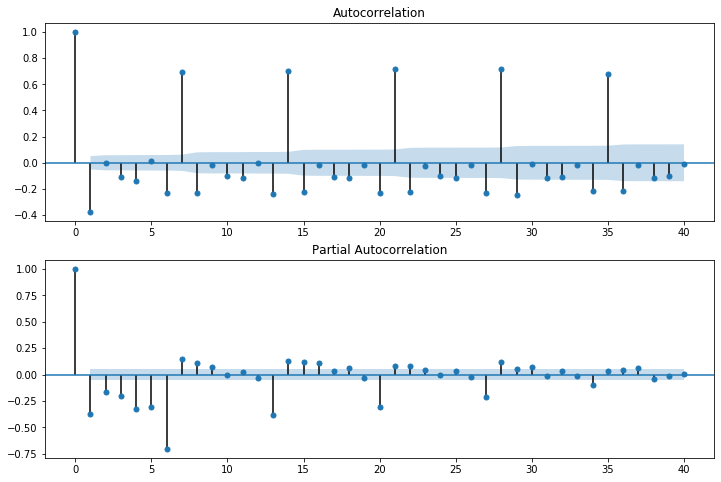

In [11]:
bar_plot(first_diff.sales)

# Step 5: Determine order of AR and MA

### From the acf and pacf plots we find that the AR order is 6 and MA order is 1.
### The series has been differenced one times so I=1

# Step 6: Fit the model

c:\users\acer\desktop\minor\arima\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\users\acer\desktop\minor\arima\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
c:\users\acer\desktop\minor\arima\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Plotting AR model


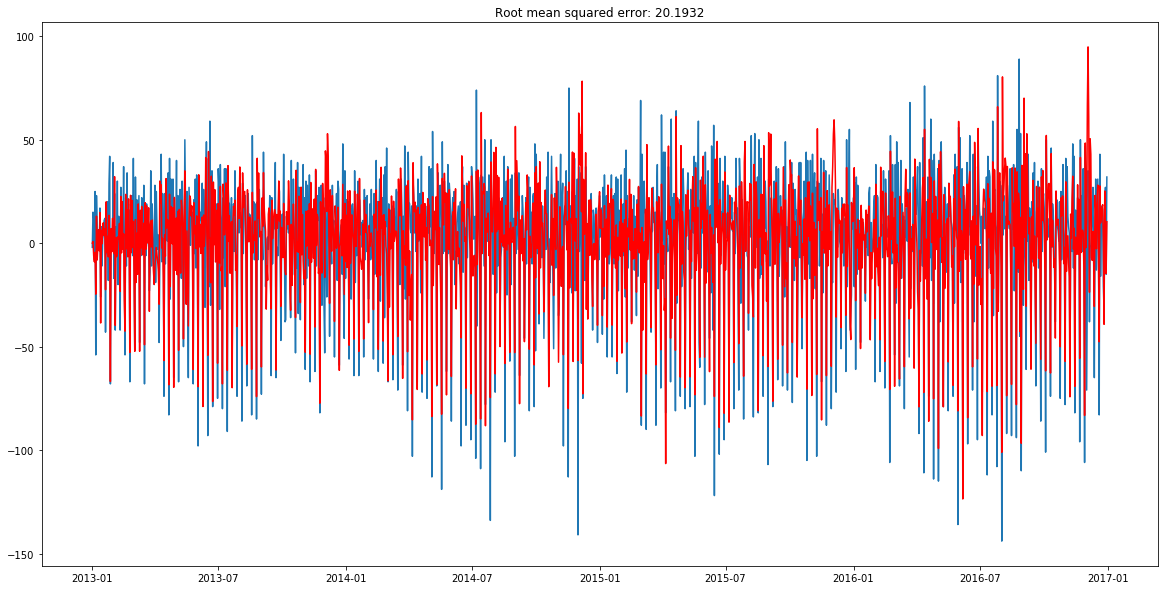

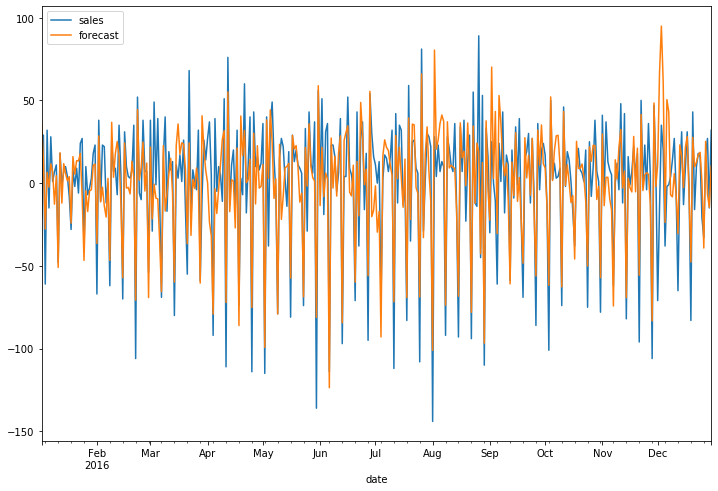

In [12]:
from statsmodels.tsa.arima_model import ARIMA

#AR MODEL (p,d,q)
model = ARIMA(df, order=(6, 1, 1))  
results_ARIMA = model.fit(disp=-1)  


plt.figure(figsize=(20,10))
plt.plot(first_diff)
# print(results_AR.fittedvalues)
plt.plot(results_ARIMA.fittedvalues, color='red')
sumSquaredError = sum((results_ARIMA.fittedvalues-first_diff["sales"])**2)
meanSquaredError = sumSquaredError/len(first_diff)
rmseOfFit  = meanSquaredError**0.5
plt.title('Root mean squared error: %.4f'% rmseOfFit)
print('Plotting AR model')
first_diff['forecast'] = results_ARIMA.fittedvalues.values
# df['forecast'] = results_AR.fittedvalues

start_index = len(df)-365
end_index = len(df)-1
first_diff[start_index:end_index][['sales','forecast']].plot(figsize=(12, 8))

#RSS needs to be minimum

# Step 7: Test the model

# i. Testing the fitted values in original scale

## i. a) converting fitted values to original scale

In [13]:
#Let "xd" denote the differenced data and "x" denote the original data. 
#Then xd[n]=x[n+1]-x[n]. Therefore, x[n+1]=x[n]+xd[n]. 
#If you add the first element of first difference forecast to the real data with the same indice, then you will get the next real data forecast.
#here used xd[n] = x[n] -x[n+1] so first becomes nan
fittedOrgScale= df.copy()#data frame has values in sales
xd= results_ARIMA.fittedvalues# series has values in values
print(type(results_ARIMA.fittedvalues))

xd=pd.concat([pd.Series([0]),xd])
end=fittedOrgScale.shape[0]#for for loop in next cell
print(fittedOrgScale.values)


<class 'pandas.core.series.Series'>
[[ 83]
 [ 81]
 [ 96]
 ...
 [155]
 [140]
 [172]]


In [14]:
print(fittedOrgScale.values[0])
#run above to run this 
j=0
for i in fittedOrgScale.index:
    
    fittedOrgScale.values[j] = fittedOrgScale.values[j+1] + xd.values[j]
    print('adding',j,fittedOrgScale.values[j+1],'+',xd.values[j],fittedOrgScale.values[j])
    j+=1
    if j+1 ==end:
        break



[83]
adding 0 [81] + 0.0 [81]
adding 1 [96] + 0.035454849241217445 [96]
adding 2 [108] + 0.7950402180156377 [108]
adding 3 [100] + -6.142023463147876 [93]
adding 4 [125] + -9.002981719725696 [115]
adding 5 [71] + -4.429506129006459 [66]
adding 6 [94] + -24.627967591117503 [69]
adding 7 [100] + 13.07187618936793 [113]
adding 8 [102] + -8.13333961753559 [93]
adding 9 [104] + -1.5588577082861335 [102]
adding 10 [102] + 6.5476410362110755 [108]
adding 11 [119] + -3.6904941379315814 [115]
adding 12 [93] + 14.791684284735462 [107]
adding 13 [101] + -38.57010785195462 [62]
adding 14 [90] + 6.235590678525403 [96]
adding 15 [92] + -0.2779560162819532 [91]
adding 16 [97] + 9.158928968046869 [106]
adding 17 [108] + 9.88577528365464 [117]
adding 18 [120] + 3.719002527624829 [123]
adding 19 [77] + 7.04286835540317 [84]
adding 20 [94] + -22.486105909230183 [71]
adding 21 [89] + 20.008308175040685 [109]
adding 22 [109] + -4.355094383041101 [104]
adding 23 [91] + 3.2895307625301413 [94]
adding 24 [120

adding 340 [137] + 41.75048589475472 [178]
adding 341 [92] + 2.239125566768161 [94]
adding 342 [104] + -29.08814003920704 [74]
adding 343 [104] + 25.79097274187309 [129]
adding 344 [94] + 12.581102855399015 [106]
adding 345 [122] + -3.890870194672754 [118]
adding 346 [129] + 23.058608498327285 [152]
adding 347 [140] + 8.278589712108731 [148]
adding 348 [85] + 0.9676739034125568 [85]
adding 349 [90] + -37.83313713703089 [52]
adding 350 [99] + 18.026409256766755 [117]
adding 351 [123] + 10.059845615893872 [133]
adding 352 [105] + -2.441948174939327 [102]
adding 353 [135] + 3.16851092377658 [138]
adding 354 [161] + 17.39449032585029 [178]
adding 355 [102] + -2.0731088308679624 [99]
adding 356 [102] + -61.46755824132687 [40]
adding 357 [108] + -1.3629310917455406 [106]
adding 358 [117] + 0.6064978111851698 [117]
adding 359 [102] + 11.330582538216431 [113]
adding 360 [150] + -6.136575150068177 [143]
adding 361 [129] + 28.440570196779277 [157]
adding 362 [83] + 1.4961127534637129 [84]
adding

adding 692 [159] + -57.17634736727943 [101]
adding 693 [200] + 43.57524519265201 [243]
adding 694 [177] + 19.440890013375483 [196]
adding 695 [200] + 1.0064435408827492 [201]
adding 696 [198] + 11.924345318230397 [209]
adding 697 [229] + -22.724514655873463 [206]
adding 698 [88] + -3.2878951594225185 [84]
adding 699 [125] + -56.66581497653766 [68]
adding 700 [121] + 62.895406063818996 [183]
adding 701 [135] + 55.71054671939544 [190]
adding 702 [169] + 37.78093276159785 [206]
adding 703 [111] + 52.528962883277345 [163]
adding 704 [170] + 15.227534200991997 [185]
adding 705 [95] + 78.31265741424413 [173]
adding 706 [118] + -72.78309635779297 [45]
adding 707 [129] + 30.848761869179825 [159]
adding 708 [111] + 4.363217970373018 [115]
adding 709 [148] + 4.9234784596047945 [152]
adding 710 [156] + 43.727742996306375 [199]
adding 711 [140] + -31.973269003512037 [108]
adding 712 [111] + 9.510212155619069 [120]
adding 713 [101] + -36.66808566909964 [64]
adding 714 [121] + 10.654087247455415 [13

adding 1060 [230] + 18.566587289189496 [248]
adding 1061 [231] + -2.9920725657788907 [228]
adding 1062 [151] + 5.608944583774072 [156]
adding 1063 [133] + -59.48561164178657 [73]
adding 1064 [114] + 26.87473348290687 [140]
adding 1065 [138] + 37.04228924471545 [175]
adding 1066 [157] + 52.717586376237364 [209]
adding 1067 [178] + 59.63646507711938 [237]
adding 1068 [185] + 49.40875889195034 [234]
adding 1069 [113] + 28.406838529407203 [141]
adding 1070 [125] + -35.71781725482914 [89]
adding 1071 [123] + 16.933176643375965 [139]
adding 1072 [149] + -6.810255203363466 [142]
adding 1073 [161] + 15.74467890158249 [176]
adding 1074 [162] + 9.658240563050365 [171]
adding 1075 [161] + 11.063321455268628 [172]
adding 1076 [110] + 10.300640196530912 [120]
adding 1077 [132] + -40.77566032930868 [91]
adding 1078 [128] + 16.919741855397387 [144]
adding 1079 [144] + -4.656585914368437 [139]
adding 1080 [133] + 18.89617933322193 [151]
adding 1081 [141] + 13.355557647088517 [154]
adding 1082 [153] + 

adding 1435 [142] + 50.47396432840769 [192]
adding 1436 [146] + 43.026469271346606 [189]
adding 1437 [160] + -7.07864569523163 [152]
adding 1438 [187] + -8.293566189336318 [178]
adding 1439 [182] + 5.716181277266873 [187]
adding 1440 [117] + -6.781953577744806 [110]
adding 1441 [120] + -30.558905976626356 [89]
adding 1442 [151] + 23.073286583901442 [174]
adding 1443 [138] + 16.534798498602402 [154]
adding 1444 [147] + -2.73125293733035 [144]
adding 1445 [178] + 21.48245175065579 [199]
adding 1446 [177] + 28.11971494270063 [205]
adding 1447 [94] + -6.852082977207239 [87]
adding 1448 [137] + -47.65525470853537 [89]
adding 1449 [121] + 27.685477111440424 [148]
adding 1450 [131] + 9.824400374299469 [140]
adding 1451 [149] + 12.572233836915128 [161]
adding 1452 [165] + 17.298158448583063 [182]
adding 1453 [144] + 18.6191447656446 [162]
adding 1454 [111] + 0.7180687228475193 [111]
adding 1455 [128] + -39.21177509040585 [88]
adding 1456 [155] + 25.230204081282363 [180]
adding 1457 [140] + -6.

In [15]:
#convert to cumulative sum
#1st make data frame as series
#series bata cumsum
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print ('prediction arima diff',type(predictions_ARIMA_diff),predictions_ARIMA_diff.head())
#to cumsum
predictions_ARIMA_diff_cumsum = pd.Series(predictions_ARIMA_diff.cumsum())
print ('cumsum',predictions_ARIMA_diff_cumsum.head())



prediction arima diff <class 'pandas.core.series.Series'> date
2013-01-02    0.035455
2013-01-03    0.795040
2013-01-04   -6.142023
2013-01-05   -9.002982
2013-01-06   -4.429506
dtype: float64
cumsum date
2013-01-02     0.035455
2013-01-03     0.830495
2013-01-04    -5.311528
2013-01-05   -14.314510
2013-01-06   -18.744016
dtype: float64


In [16]:
# df1= df.drop(df.index[0])
#dropping first value of original as fitted is from second index
df1=df.drop(df.index[0])
x1=fittedOrgScale.copy()
len(x1)


1460

# rmse of the fitted line for training data

In [17]:
error = df.sales - fittedOrgScale.values.reshape(fittedOrgScale.values.shape[0])
meanAbsoluteError = sum([abs(x) for x in error])/len(error)
squaredError = [x**2 for x in error]
meanError = sum(squaredError)/len(squaredError)
RMSE = meanError**0.5
highestScale = np.amax(dffiltered.values)
print('The Root Mean Squared Error is',RMSE,'The range of data is 0 to ',highestScale)

The Root Mean Squared Error is 42.36461918752616 The range of data is 0 to  334


### i.b) plot original vs fitted values in original scale

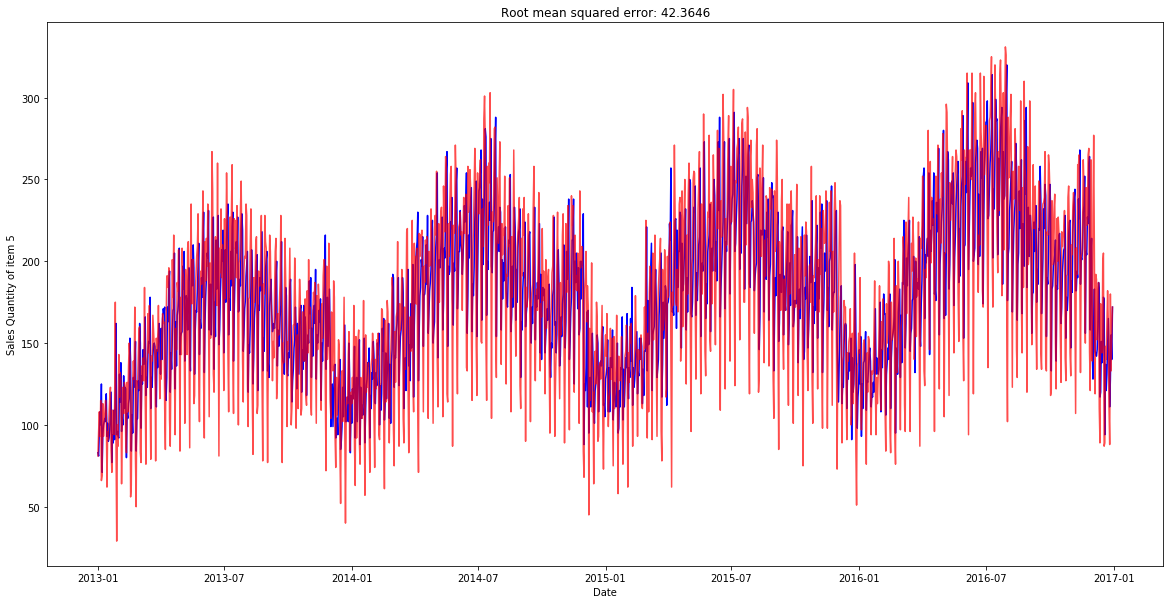

1460 1460


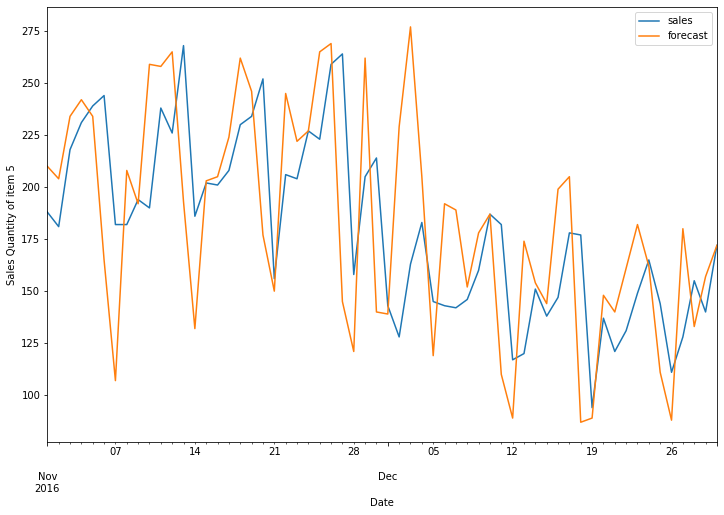

In [18]:
plt.figure(figsize=(20,10))
plt.plot(df.sales,color='blue')
plt.plot(x1,'r-', alpha=0.7)
plt.title('Root mean squared error: %.4f'% RMSE)
plt.xlabel("Date")
plt.ylabel("Sales Quantity of item "+str(itemno))
plt.show()
print(len(df),len(x1))
df['forecast'] = x1.values
start_index =1400
end_index =start_index+365

df[start_index:end_index][['sales','forecast']].plot(figsize=(12, 8))
plt.xlabel("Date")
plt.ylabel("Sales Quantity of item "+str(itemno))
plt.show()

## ii. Testing the predicted values

In [19]:
fitLen = len(results_ARIMA.fittedvalues)

lastTwo= len(results_ARIMA.fittedvalues)-2*365

c:\users\acer\desktop\minor\arima\lib\site-packages\statsmodels\tsa\base\tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


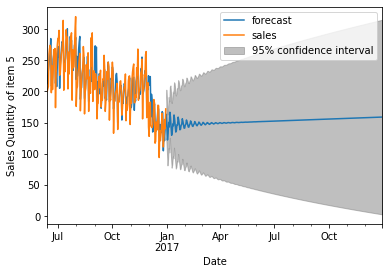

In [20]:
results_ARIMA.plot_predict(fitLen-200,fitLen+365)#start rows + end rows of forecast rows 18260+40
plt.xlabel("Date")
plt.ylabel("Sales Quantity of item "+str(itemno))
plt.show()

c:\users\acer\desktop\minor\arima\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


2016-12-31    163.343336
2017-01-01    144.267183
2017-01-02    122.099150
2017-01-03    131.699257
2017-01-04    150.290157
Freq: D, dtype: float64


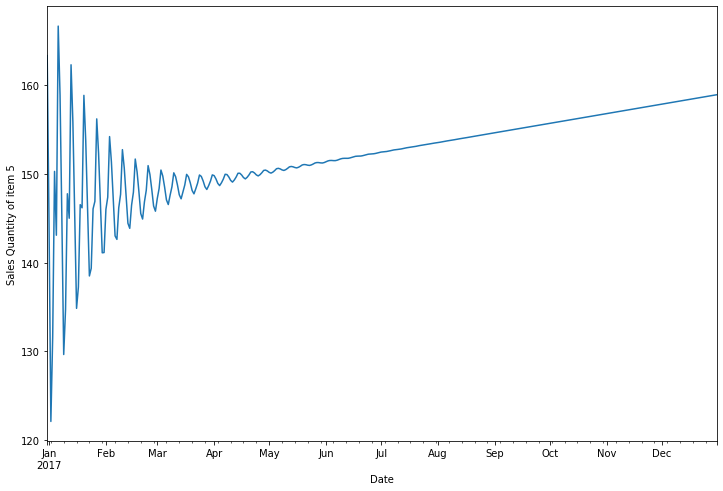

In [21]:
yearPrediction=results_ARIMA.predict(start='2016-12-31', end='2017-12-31', exog=None, typ='levels', dynamic=False) # this works
print(yearPrediction.head())

yearPrediction.plot(figsize=(12, 8))
plt.xlabel("Date")
plt.ylabel("Sales Quantity of item "+str(itemno))
plt.show()

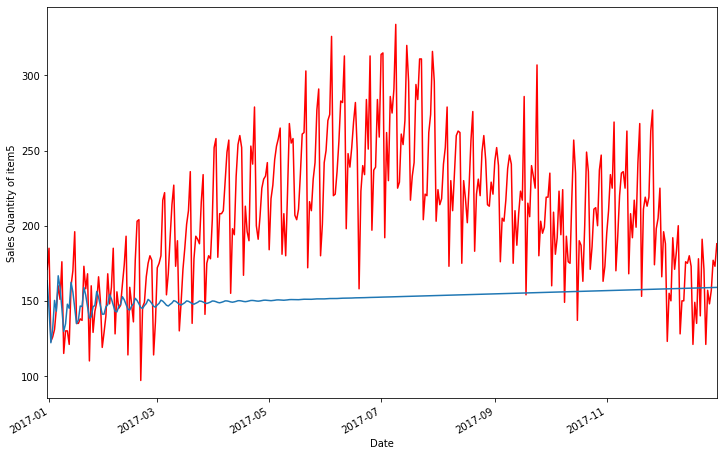

In [22]:
plt.plot(test.sales,color='red',)
plt.xlabel("Date")
plt.ylabel("Sales Quantity of item"+str(itemno))
yearPrediction.plot(figsize=(12, 8))
plt.show()

In [23]:
#yearPrediction diff = orgscale - (orgscale-interval)
#orgscale = diff + (orgscale-interval
yearPrediction=results_ARIMA.predict(start='2016-12-31', end='2017-12-31', exog=None, typ='linear', dynamic=False)
from datetime import timedelta
j=0
orgscale =yearPrediction.copy()
for i in range(len(yearPrediction.index)):
    if j<=365:
               orgscale.values[j]= yearPrediction.values[j]+dffiltered.sales[pd.to_datetime(orgscale.index[j])-timedelta(days=365)]
    j+=1
 
print(orgscale)


2016-12-31    137.343336
2017-01-01    105.923848
2017-01-02    131.831967
2017-01-03    102.600107
2017-01-04    143.590900
2017-01-05    102.803833
2017-01-06    161.580730
2017-01-07    131.211046
2017-01-08    132.015651
2017-01-09    141.743401
2017-01-10    114.088296
2017-01-11    140.036239
2017-01-12    123.240790
2017-01-13    150.301888
2017-01-14    136.542116
2017-01-15    136.749717
2017-01-16    128.245983
2017-01-17    113.407560
2017-01-18    128.282647
2017-01-19    116.648142
2017-01-20    138.676149
2017-01-21    114.912712
2017-01-22    136.474003
2017-01-23    163.250381
2017-01-24    131.868470
2017-01-25    147.691044
2017-01-26    134.856883
2017-01-27    140.293706
2017-01-28    130.134617
2017-01-29    146.459053
                 ...    
2017-12-02    128.035518
2017-12-03    163.035472
2017-12-04    183.035418
2017-12-05    145.035393
2017-12-06    143.035416
2017-12-07    142.035464
2017-12-08    146.035503
2017-12-09    160.035504
2017-12-10    187.035470


c:\users\acer\desktop\minor\arima\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
c:\users\acer\desktop\minor\arima\lib\site-packages\statsmodels\tsa\base\tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


In [24]:
#out sample 
error = orgscale.values-test.values.reshape(test.values.shape[0])
highestScale = np.amax(test.values)
meanAbsoluteError = sum([abs(x) for x in error])/len(error)
squaredError = [x**2 for x in error]
meanError = sum(squaredError)/len(squaredError)
RMSE2 = meanError**0.5
print(RMSE2,meanAbsoluteError,highestScale)


39.91636774195553 31.57536524568055 334


The root mean squared error is  39.91636774195553


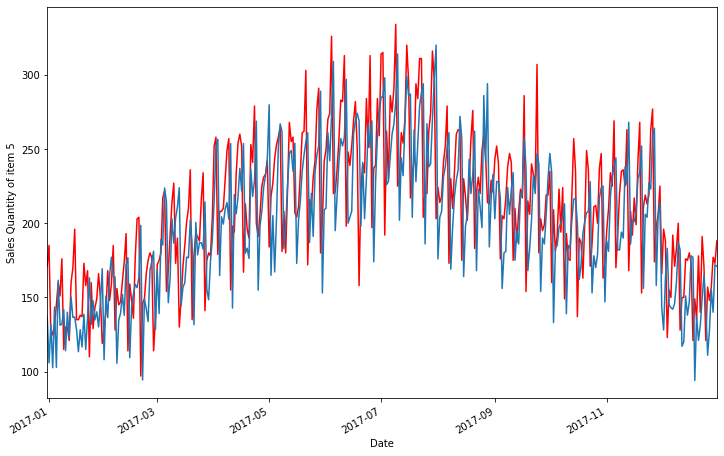

In [25]:
print("The root mean squared error is ",RMSE2)
plt.xlabel("Date")
plt.ylabel("Sales Quantity of item "+str(itemno))
plt.plot(test.sales,color='red',)
orgscale.plot(figsize=(12, 8))
plt.show()

In [26]:
# print(test.head())
# print(orgscale.head())
# print(test.tail())
# print(orgscale.tail())

In [27]:

print('the Alkaike Information Criterion is ',results_ARIMA.aic)

the Alkaike Information Criterion is  12930.48484446339


# EXPORTING AS JSON

In [28]:
dft= pd.DataFrame({'date':orgscale.index, 'sales quantity':orgscale.values})

dft['date'] = pd.to_datetime(dft['date'])#convert to date time object
dft['item'] = itemno
print(dft.tail())

          date  sales quantity  item
361 2017-12-27      128.035435     5
362 2017-12-28      155.035456     5
363 2017-12-29      140.035476     5
364 2017-12-30      172.035478     5
365 2017-12-31      171.035464     5


In [29]:
export=dft.to_json(orient='records',date_format='iso')

In [30]:
print(export)
dft.to_json(path_or_buf=r'C:\Users\Acer\Desktop\minor\env\src\predicted{}.json'.format(itemno),orient='records',date_format='iso')

[{"date":"2016-12-31T00:00:00.000Z","sales quantity":137.3433358082,"item":5},{"date":"2017-01-01T00:00:00.000Z","sales quantity":105.9238476832,"item":5},{"date":"2017-01-02T00:00:00.000Z","sales quantity":131.8319666113,"item":5},{"date":"2017-01-03T00:00:00.000Z","sales quantity":102.6001065351,"item":5},{"date":"2017-01-04T00:00:00.000Z","sales quantity":143.5908999622,"item":5},{"date":"2017-01-05T00:00:00.000Z","sales quantity":102.803833102,"item":5},{"date":"2017-01-06T00:00:00.000Z","sales quantity":161.5807296251,"item":5},{"date":"2017-01-07T00:00:00.000Z","sales quantity":131.2110463131,"item":5},{"date":"2017-01-08T00:00:00.000Z","sales quantity":132.0156506937,"item":5},{"date":"2017-01-09T00:00:00.000Z","sales quantity":141.7434007249,"item":5},{"date":"2017-01-10T00:00:00.000Z","sales quantity":114.0882957577,"item":5},{"date":"2017-01-11T00:00:00.000Z","sales quantity":140.0362392412,"item":5},{"date":"2017-01-12T00:00:00.000Z","sales quantity":123.240790048,"item":5},